## Homework 8

**Ruixue Gong, N17593858**

**Exercise 1**: Show that if $\mathscr{P}(S)$ is compact as a subset of $(l_1(S),\parallel \cdot\parallel)$, then S must be finite.

**Proof**: Suppose that S is countably infinite. Consider a set $A = \{(1,0,\dots, 0), (0,1,\dots, 0),\dots, (0,0,\dots,1)\}$. Notice that this set doesn't have a limits point. So it is closed. Since $\mathscr{P}(S)$ is compact, its closed subset $A$ should be compact as well. Then we can find an open cover $\bigcup \limits_{x\in A}N_{\frac{1}{2}}(x)$. We cannot find a finite subcover to cover A from this open cover, since any two elements in A has a distance lager than $\frac{1}{2}$. So it contradicts to A is compact. 

**Exercise 2**: Markov chain $X_{t+1}=X_t+1$ on $\mathbb{Z}$. The corresponding stochastic kernel is $p(x, y) = \mathbf{1}\{x = y-1\}$. Show that no stationary distribution exists.

**Proof**: Suppose that there exists a stationary distribution $\varphi$. By definition of stationary distribution, we have $\varphi^*(y)=\sum\limits_{x\in S} p(x, y) \varphi^*(x)=\sum\limits_{x\in S}\mathbf{1}\{x = y-1\}\varphi^*(x)=\varphi^*(y-1)$. However this equation should hold for any state y, rather than special case $y=y-1$. Thus it is a contradiction.

**Exercise 3**:Argue that this stochastic kernel is globally statble for every q and Q.

**Proof**: Notice that $$X_{t+1}=\begin{cases} Q - D_{t+1}, \quad \text{ if }X_t\leq q
\\
X_t - D_{t+1}, \quad \text{ otherwise}
\end{cases}$$
, where q and Q are intergers such that $0\leq q\leq Q$.

We can found that randomness comes from the demand shock $(D_t)_{t\geq 1}$. Based on the preassumption that this demand up to its current stock level, $D_t$ will never exceed Q. Therefore there are finite states that characterized by inventory $X_t = \{0,1,\dots, Q\}$.Thus $\mathscr{P}(q,Q)$ is compact. 

Moreover, since demand schock is assumed to be IID, there is no limitation jumping from one state to another. So this sochastic kernal $p$ is irreducible. Notice that $p(x,x) \geq 0.5^1>0$ according to ordering rule, therefore this stochastic kernel is aperiodic.

By theorem on lecture note, we can conclude that this stochastic kernel is globally stable.

**Exercise 4**: Compute the stationary distribution when $q=2$ and $Q=5$. You should get $$\varphi ^*_2= (0.0625, 0.0625, 0.125, 0.25, 0.25, 0.25)$$

In [1]:
import quantecon as qe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters setting 
Q = 5
q = 2

Define a function $p(x, y)$ to calculate stochastic kernel

In [3]:
def p(x,y):
    if x <= q:
        val = (0.5)**(Q-y+1)
    elif x > q and y <= x: 
        val = (0.5)**(x-y+1)
    else:
        val = 0
    return val

Define a function get_sto_mat(q, Q) to get stochastic matrix given q and Q

In [4]:
def get_sto_mat(q, Q):   
    P = np.zeros((Q+1, Q+1))
    for i in range(Q+1): #row
        for j in range(Q+1): #col
            P[i,j] = p(i,j)   #python counts from 0
    
    for i in range(Q+1):
        P[i, 0] = 1 - sum(P[i, 1:(Q+1)])
        
    return P

In [5]:
mc = qe.MarkovChain(get_sto_mat(q,Q))
s_dist = mc.stationary_distributions
print("The stationary distribution I got is\n", s_dist)

The stationary distribution I got is
 [[ 0.0625  0.0625  0.125   0.25    0.25    0.25  ]]


**Exercise 5**: compute the stationary distribution iteratively, not by quantecon package.

In [6]:
def stationary_dist(q, Q , tol, phi_0):
    P = get_sto_mat(q, Q)
    phi_a = phi_0
    phi_b = phi_0 @ P
    while np.any(sum(abs(phi_b-phi_a)) > tol): #l_1 distance
        phi_a = phi_b
        phi_b = phi_a @ P
    return phi_b    

In [7]:
#Parameters Setting
phi_0 = np.asarray([1/(Q+1)]*(Q+1)) #given initiary distribution
tol = 1e-11

In [8]:
dist = stationary_dist(q, Q, tol, phi_0)
print("The distribution I got is\n", dist)

The distribution I got is
 [ 0.0625  0.0625  0.125   0.25    0.25    0.25  ]


**Comparison**: Obviously, these two results are the same. 

**Exercise 6**: Set $Q = 20$ and plot the stationary distribution for $q= 2, 5, 10, 15$. Give some interpretation for what you see.

In [9]:
# Parameters Setting
q_list = [2, 5, 10, 15]
Q = 20
phi_0 = np.asarray([1/(Q+1)]*(Q+1))
tol = 1e-11

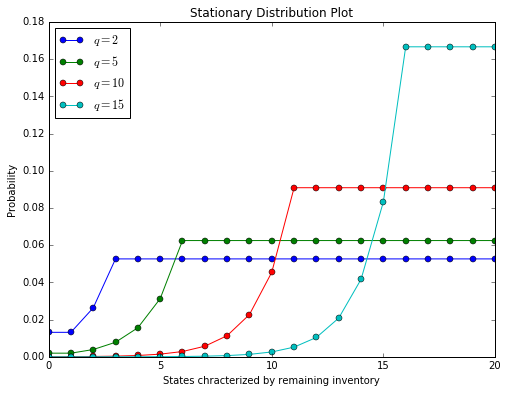

In [12]:
%matplotlib inline

fig, ax = plt.subplots(figsize = (8,6))
for q in q_list:
    x = list(range(Q+1))
    y = stationary_dist(q, Q, tol, phi_0)
    label_of_line = r'$q = {0:.0f}$'.format(q)
    ax.plot(x, y, linewidth=1, label = label_of_line,marker='o')
    
plt.title('Stationary Distribution Plot')
plt.xlabel('States chracterized by remaining inventory')
plt.ylabel('Probability')
plt.legend(loc = 'upper left')
plt.show()

**Interpretation**:

1. Stationay Distribution always put a heavier mass on higher remainning inventory. Because the higher the remianinig inventroy, the higher possibility that the firm can meet up the demand.

2. Larger q contributes to a fact that less mass has been put on a smaller remaining inventory, and more mass has been put on a greater remianing inventory. Higher q indicates that the firm renew its inventory more frequently and makes more orders of adding inventory. It is more likely for this firm to have a higher remainnig inventory.